# FINAL PROJECT 1 - LINEAR REGRESSION

  Nama         : Gusti Salsatin Amrisa
        
  Kode Peserta : PYTN-KS15-010
     
        
## Introduction
Anggota :
* Diva Alvania Andi Abduh
* Gusti Salsatin Amrisa
* Roiqhatul Inayah

Kelas : PYTN-KS-015

Kampus Merdeka - Python for data Science

### Latar Belakang
Di era yang serba digital dan tak liput dari teknologi ini memicu masyarakat untuk mengambil langkah yang lebih cepat untuk mendapatkan tujuan tertentu. Perkembangan teknologi yang cukup signifikan dalam menunjang kehidupan masyarakat saat ini adalah akses internet pada smartphone. Internet yang ada ini terus berkembang dalam berbagai bidang, contohnya di bidang mobilisasi. Hal ini mempengaruhi adanya layanan transportasi secara online sehingga masyarakat dapat melakukan pemesanan secara cepat seperti taxi online.

Perusahaan taxi online yang populer di New york adalah Uber dan Lyft. Uber mulai memasuki pasar New York pada tahun 2011, sedangkan Lyft mulai memasuki pasar New York pada tahun 2014. Persaingan dari dua taxi online yang popular ini tentunya menjadi hal yang menarik. Jika dilihat dari berbagai faktor yang berpengaruh, perbedaan record data pemesanan dari dua perusahaan ini tidak memiliki perbedaan yang cukup besar. Demi membandingkan kedua perusahaan tersebut maka digunakan regresi linear untuk mendapatkan model yang sesuai dengan data tersebut.

### Data
Dataset yang digunakan adalah [Uber vs Lyft Dataset New York, USA](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma), merupakan data harga armada perjalanan menggunakan Uber dan Lfyt di New York, USA yang berdasarkan waktu, penggandaan harga *(surge multiplier)*, jarak dan keadaan cuaca pada saat itu. Dataset ini terdiri dari 693071 observasi dengan 57 atribut dengan 10 diantaranya paling relevan. Variabel dependen/responnya adalah `price`. LinearRegression digunakan untuk mengetahui bagaimana pengaruh waktu, penggandaan harga, dan jarak terhadap variasi harga dan juga mendapatkan model prediksi harga armada Uber dan Lyft berdasarkan faktor-faktor yang diketahui.
    
- Cab_type: Merek transportasi online (Uber, Lyft).
- Name: Jenis mobil yang dipilih (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, WAV, Black, UberX, Lux Black, Shared).
- Hour: Pukul berapa transfortasi online dipesan (24 jam).
- Day: Tanggal berapa transpotasi online dipesan.
- Month:Bulan apa saja transportasi online dipesan (bulan 11 dan 12).
- Distance: Jarak yang ditempuh (km). 
- Short_summary: Cuaca ketika transportasi online dipesan (Overcast, Mostly Cloudy, Partly Cloudy, Clear, Light Rain, Rain, Possible Drizzle, Foggy, Drizzle).


### Objective
Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
1. Mampu memahami konsep regression dengan Linear Regression
2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi

### Import Libraries

In [7]:
# library for DataFrame
import pandas as pd
import numpy as np

# library for datetime
from datetime import datetime

# library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

# library for analysis
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle

# libarary for ignore warning
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [8]:
# load dataset menggunakan pandas dan menampilkan semua kolomnya
df = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max.columns', None)
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [9]:
# menampilkan informasi dasar kerangka dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Berdasarkan informasi di atas, dataset terdiri dari 693071 baris dan 57 kolom. Terdapat 29 tipe data yang memiliki tipe float, 17 data dengan tipe integer, dan 11 data dengan tipe object/kategori. Terdapat hanya 637976 dari 693071 dengan asumsi terdapat null-value pada kolom price.

Penjelasan kolom dataset:

1.	id = nomor identifikasi unik untuk setiap perjalanan
2.	timestamp = waktu perjalanan dimulai
3.	hour = jam perjalanan dimulai
4.	day = hari perjalanan dimulai
5.	month = bulan perjalanan dimulai
6.	datetime = waktu perjalanan dimulai
7.	timezone = zona waktu perjalanan dimulai
8.	source = lokasi awal perjalanan
9.	destination = lokasi tujuan perjalanan
10.	cab_type = jenis taksi yang digunakan dalam perjalanan (Uber atau Lyft)
11.	product id = kode unik identifikasi layanan digunakan
12.	name = nama mobil layanan yang digunakan
13.	price = harga yang dibebankan dalam perjalanan
14.	distance = jarak perjalanan dalam mil
15.	surge_multiplier = rasio pengganda tarif perjalanan saat permintaan tinggi
16.	latitude = lintang lokasi awal perjalanan
17.	longitude = bujur lokasi awal perjalanan
18.	tempretaure = suhu lokasi awal perjalanan
19.	apparentTemperature: suhu yang dirasakan di lokasi awal perjalanan.
20.	short_summary= ringkasan cuaca di lokasi awal
21.	long_summary = deskripsi cuaca di lokasi awal
22.	precipIntensity= intensitas curah hujan di lokasi awal perjalanan
23.	precipProbability = probabilitas curah hujan di lokasi awal perjalanan
24.	humidity: kelembaban di lokasi awal
25.	windSpeed: kecepatan angin di lokasi awal perjalanan.
26.	windGust: kecepatan rata-rata dari lonjakan angin di lokasi awal perjalanan
27.	windGustTime: waktu lonjakan angin terjadi
28.	visibility: jarak pandang di lokasi awal perjalanan
29.	temperatureHigh: suhu tertinggi di lokasi awal
30.	temperatureHighTime: waktu suhu tertinggi terjadi di lokasi awal perjalanan.
31.	temperatureLow: suhu terendah di lokasi awal perjalanan
32.	temperatureLowTime: waktu suhu terendah terjadi di lokasi awal perjalanan
33.	apparentTemperatureHigh: suhu yang dirasakan tertinggi di lokasi awal perjalanan
34.	apparentTemperatureHighTime: waktu suhu yang dirasakan tertinggi terjadi di lokasi awal perjalanan
35.	apparentTemperatureLow: suhu yang dirasakan terendah di lokasi awal perjalanan.
36.	apparentTemperatureLowTime: waktu suhu yang dirasakan terendah terjadi di lokasi awal perjalanan
37.	icon: ikon cuaca di lokasi awal
38.	dewPoint: titik embun di lokasi
39.	pressure: tekanan udara di satuan millibar (mb)
40.	windBearing: arah angin dalam derajat dari utara searah jarum jam, diukur pada ketinggian 10 meter di atas permukaan tanah
41.	cloudCover: persentase tutupan awan
42.	uvIndex: indeks radiasi ultraviolet yang diproyeksikan pada tengah hari matahari
43.	visibility.1: jarak pandang pada satuan mil
44.	ozone: konsentrasi ozon
45.	sunriseTime: waktu matahari terbit
46.	sunsetTime: waktu matahari terbenam
47.	moonPhase: fase bulan dalam skala 0 hingga 1
48.	precipIntensityMax: intensitas presipitasi maksimum dalam satuan inci per jam (in/h)
49.	uvIndexTime: waktu ketika uvIndex dihitung
50.	temperatureMin: suhu minimum pada hari itu dalam satuan Fahrenheit (°F)
51.	temperatureMinTime: waktu ketika suhu minimum terjadi
52.	temperatureMax: suhu maksimum pada hari itu dalam satuan Fahrenheit (°F)
53.	temperatureMaxTime: waktu ketika suhu maksimum terjadi
54.	apparentTemperatureMin: suhu minimum yang dirasakan pada hari itu dalam satuan Fahrenheit (°F)
55.	apparentTemperatureMinTime: waktu ketika suhu minimum yang dirasakan terjadi
56.	apparentTemperatureMax: suhu maksimum yang dirasakan pada hari itu dalam satuan Fahrenheit (°F)
57.	apparentTemperatureMaxTime: waktu ketika suhu maksimum yang dirasakan terjadi

In [10]:
# menampilkan nilai unik pada setiap kolom
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [11]:
# menampilkan statistik deskriptif kolom numerik pada dataset
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

## Data Cleaning

In [13]:
# menampilkan mussing value pada dataset
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat 55095 missing value pada kolom price yang akan dihapus.

In [14]:
# menampilkan data duplikat pada dataset
df.duplicated().sum()

0

Tidak terdapat data duplikat pada dataset tersebut.

Karena terdapat missing value pada kolom price dataset, maka akan dilakukan drop data.

In [15]:
# drop missing value pada dataset
df.dropna(inplace = True)

# menampilkan kembali dataset
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1

Setelah mengatasi missing value, selanjutnya akan dilakukan eksplorasi data.

### Mengubah Kolom datetime yang Bertipe Object Menjadi Tipe Datetime

In [16]:
# mengubah kolom tipe kolom datetime
df['datetime'] = pd.to_datetime(df['datetime'])

## Exploratory Data Analysis

#### Variabel cab_type

In [17]:
# membuat tabel berisi total data dari kolom cab_type
df_type = pd.DataFrame(df['cab_type'].value_counts())
df_type

,cab_type
Uber,330568
Lyft,307408


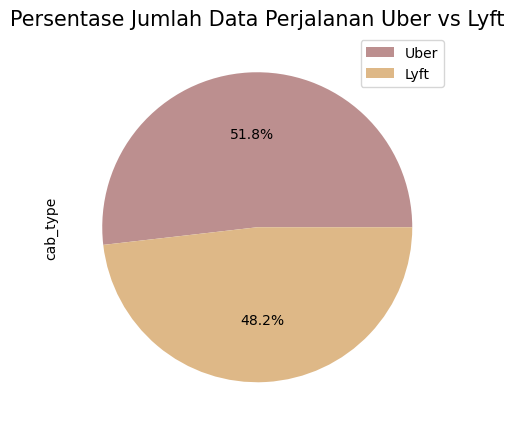

In [18]:
# visualisasi jumlah data cab_type
df_type['cab_type'].plot(kind = 'pie', 
                         figsize = (5, 6),
                         autopct='%1.1f%%',
                         labels = None, 
                         colors = ['rosybrown','burlywood'])
plt.title('Persentase Jumlah Data Perjalanan Uber vs Lyft', fontsize = 15)
plt.legend(labels = df_type.index)
plt.show()

Kesimpulan : Berdasarkan, visualisasi di atas terlihat bahwa rekam perjalanan uber lebih banyak dibandingkan lyft yang artinya uber lebih sering dipesan sebagai layanan perjalanan daripada lyft dengan selisih 23160.

### Korelasi antara variabel price, surge_multiplier, dan distance

In [19]:
# mendefinisikan masing-masing variabel
df_psd = df[['distance', 'price', 'surge_multiplier', 'cab_type']]
df_uber = df_psd[df_psd['cab_type'] == 'Uber']
df_lyft = df_psd[df_psd['cab_type'] == 'Lyft']

In [20]:
# menampilkan data df_uber
print(df_uber)

# menghitung koefisien korelasi df_uber
print(df_uber.corr())

# melihat nilai unik df_uber
print('    ')
print('unique value of df_uber:')
print(df_uber.nunique())

        distance  price  surge_multiplier cab_type
12          1.11   12.0               1.0     Uber
13          1.11   16.0               1.0     Uber
14          1.11    7.5               1.0     Uber
15          1.11    7.5               1.0     Uber
16          1.11   26.0               1.0     Uber
...          ...    ...               ...      ...
693065      1.00    9.5               1.0     Uber
693066      1.00   13.0               1.0     Uber
693067      1.00    9.5               1.0     Uber
693069      1.00   27.0               1.0     Uber
693070      1.00   10.0               1.0     Uber

[330568 rows x 4 columns]
                  distance     price  surge_multiplier
distance          1.000000  0.336204               NaN
price             0.336204  1.000000               NaN
surge_multiplier       NaN       NaN               NaN
    
unique value of df_uber:
distance            422
price               127
surge_multiplier      1
cab_type              1
dtype: int64


Berdasarkan hasil di atas, diketahui bahwa Uber tidak memberlakukan penggandaan harga karena surge_multiplier hanya memiliki 1 nilai unik. Di sisi lain, korelasi antara variabel distance dan price sebesar 0,34 yang berarti korelasi keduanya tidak begitu kuat namun saling berpengaruh secara positif. Interpretasinya: semakin jauh jarak yang ditempuh, maka harganya akan meningkat pula.

In [21]:
# menampilkan data df_lyft
print(df_lyft)

# menghitung koefisien korelasi df_lyft
print(df_lyft.corr())

# melihat nilai unik df_uber
print('    ')
print('unique value of df_lyft:')
print(df_lyft.nunique())

        distance  price  surge_multiplier cab_type
0           0.44    5.0               1.0     Lyft
1           0.44   11.0               1.0     Lyft
2           0.44    7.0               1.0     Lyft
3           0.44   26.0               1.0     Lyft
4           0.44    9.0               1.0     Lyft
...          ...    ...               ...      ...
693042      3.11   16.5               1.0     Lyft
693043      3.11   22.5               1.0     Lyft
693048      3.11    7.0               1.0     Lyft
693051      3.11   10.5               1.0     Lyft
693053      3.11   32.5               1.0     Lyft

[307408 rows x 4 columns]
                  distance     price  surge_multiplier
distance          1.000000  0.361567          0.040076
price             0.361567  1.000000          0.308237
surge_multiplier  0.040076  0.308237          1.000000
    
unique value of df_lyft:
distance            513
price                46
surge_multiplier      7
cab_type              1
dtype: int64


Berdasarkan hasil di atas, diketahui bahwa Lyft memberlakukan penggandaan harga karena surge_multiplier hanya memiliki 7 nilai unik. Di sisi lain, terdapat korelasi antara variabel distance dan price sebesar 0,36 yang berarti korelasi keduanya tidak begitu kuat namun saling berpengaruh secara positif. Interpretasinya: semakin jauh jarak yang ditempuh, maka harganya akan meningkat pula. Selain itu, korelasi antara variabel distance dan surge_multiplier sebesar 0,04 yang berarti korelasi keduanya sangat lemah namun saling berpengaruh secara positif. Interpretasinya: kenaikan nilai pada penggandaan harga memengaruhi pula kenaikan harga.

### Kolom price berdasarkan distance dan cab_type

In [22]:
# membuat dataframe Uber & Lyft berdasarkan jarak dan tipenya
df_distanceprice = df[['cab_type', 'distance', 'price']]
df_distanceprice.dropna(axis = 0, inplace = True)
df_distanceprice

,cab_type,distance,price
0,Lyft,0.44,5.0
1,Lyft,0.44,11.0
2,Lyft,0.44,7.0
3,Lyft,0.44,26.0
4,Lyft,0.44,9.0
...,...,...,...
693065,Uber,1.00,9.5
693066,Uber,1.00,13.0
693067,Uber,1.00,9.5
693069,Uber,1.00,27.0


In [23]:
# membuat pivot table price berdasarkan cab_type dengan distance sebagai variabel index
df_price = pd.pivot_table(df_distanceprice, columns = 'cab_type', index = 'distance', values = 'price', aggfunc = np.mean)
df_price

cab_type,Lyft,Uber
distance,,
0.02,NaN,11.850000
0.03,NaN,11.666667
0.04,NaN,12.000000
0.12,NaN,12.000000
0.17,NaN,11.583333
...,...,...
7.45,NaN,26.000000
7.46,NaN,27.374444
7.50,NaN,28.472222


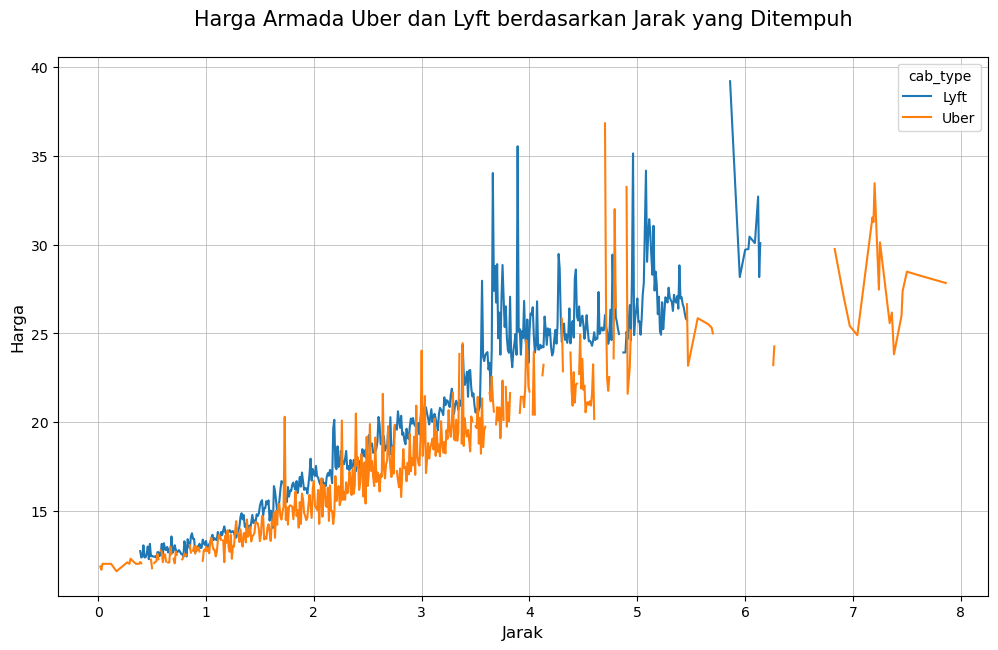

In [24]:
# membuat line chart price berdasarkan cab_type dengan distance sebagai variabel x 
df_price.plot(kind = 'line', figsize = (12,7))
plt.title('Harga Armada Uber dan Lyft berdasarkan Jarak yang Ditempuh\n', fontsize = 15)
plt.xlabel('Jarak', fontsize = 12)
plt.ylabel('Harga', fontsize = 12)
plt.grid(linewidth = 0.5)
plt.show()

Berdasarkan visualisasi di ata, diketahui bahwa Lyft cenderung memberikan harga yang tinggi dibandingkan Uber. Dengan asumsi, Uber memiliki jarak tempuh yang lebih jauh dengan harga yang lebih ekonomis.

### Hubungan antara cab_type dengan price

In [25]:
# mendefinisikan masing-masing variabel berdasarkan tipe
df_ndp = df[['name', 'distance', 'price','cab_type']]
df_typeuber = df_ndp[df_ndp['cab_type'] == 'Uber']
df_typelyft = df_ndp[df_ndp['cab_type'] == 'Lyft']

# membuat tabel pivot table yang menampilkan harga berdasarkan jarak sesuai dengan tipe taksi
pivot_uber = pd.pivot_table(df_typeuber, columns = 'name', index = 'distance')
pivot_lyft = pd.pivot_table(df_typelyft, columns = 'name', index = 'distance')

print('Tabel Harga berdasarkan Jarak dan Tipe Taksi Uber')
print(pivot_uber)
print(         )
print('Tabel Harga berdasarkan Jarak dan Tipe Taksi Lyft')
print(pivot_lyft)

Tabel Harga berdasarkan Jarak dan Tipe Taksi Uber
              price                                                       
name          Black  Black SUV   UberPool      UberX     UberXL        WAV
distance                                                                  
0.02      15.000000  27.500000   6.500000   6.700000   8.700000   6.700000
0.03      15.264706  26.661765   5.205882   7.147059   8.573529   7.147059
0.04      15.000000  27.500000   7.000000   7.000000   8.500000   7.000000
0.12      15.000000  27.500000   7.000000   7.000000   8.500000   7.000000
0.17      16.000000  27.000000   4.500000   7.000000   8.000000   7.000000
...             ...        ...        ...        ...        ...        ...
7.45      38.000000  46.000000  12.000000  16.000000  28.000000  16.000000
7.46      39.706667  49.075556  13.724444  16.731111  28.277778  16.731111
7.50      42.000000  51.166667  14.666667  17.333333  28.333333  17.333333
7.62      42.000000  51.500000  13.500000  17.0000

Text(0, 0.5, 'Harga')

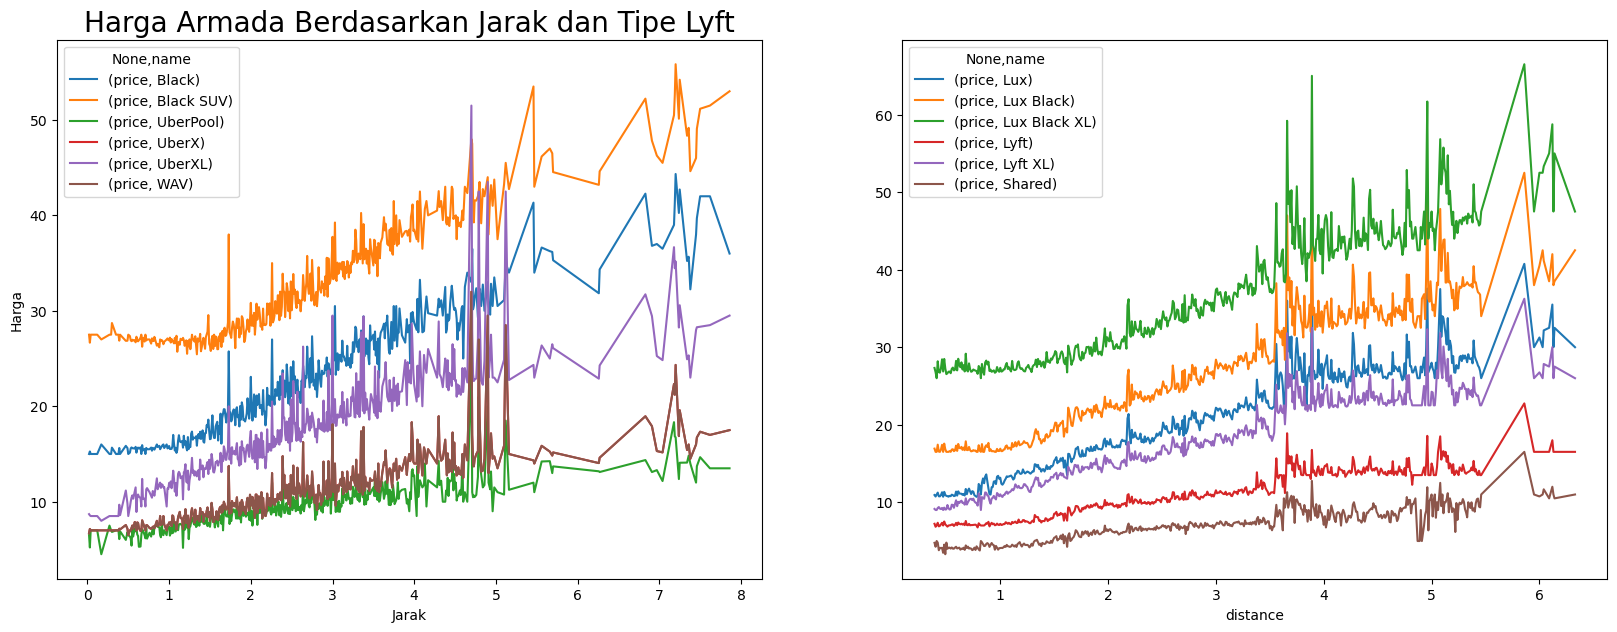

In [26]:
# membuat line chart berdasarkan dataframe Uber dan Lyft type
fig = plt.figure(figsize = (20,7))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

#Line chart untuk dataframe Uber type
pivot_uber.plot(kind = 'line', ax = ax0)
ax0.set_title('Harga Armada Berdasarkan Jarak dan Tipe Uber', fontsize = 20)
ax0.set_xlabel('Jarak', fontsize = 10)
ax0.set_ylabel('Harga', fontsize = 10)

#Line chart untuk dataframe Lyft type
pivot_lyft.plot(kind = 'line', ax = ax1)
ax0.set_title('Harga Armada Berdasarkan Jarak dan Tipe Lyft', fontsize = 20)
ax0.set_xlabel('Jarak', fontsize = 10)
ax0.set_ylabel('Harga', fontsize = 10)

Text(0, 0.5, 'Harga')

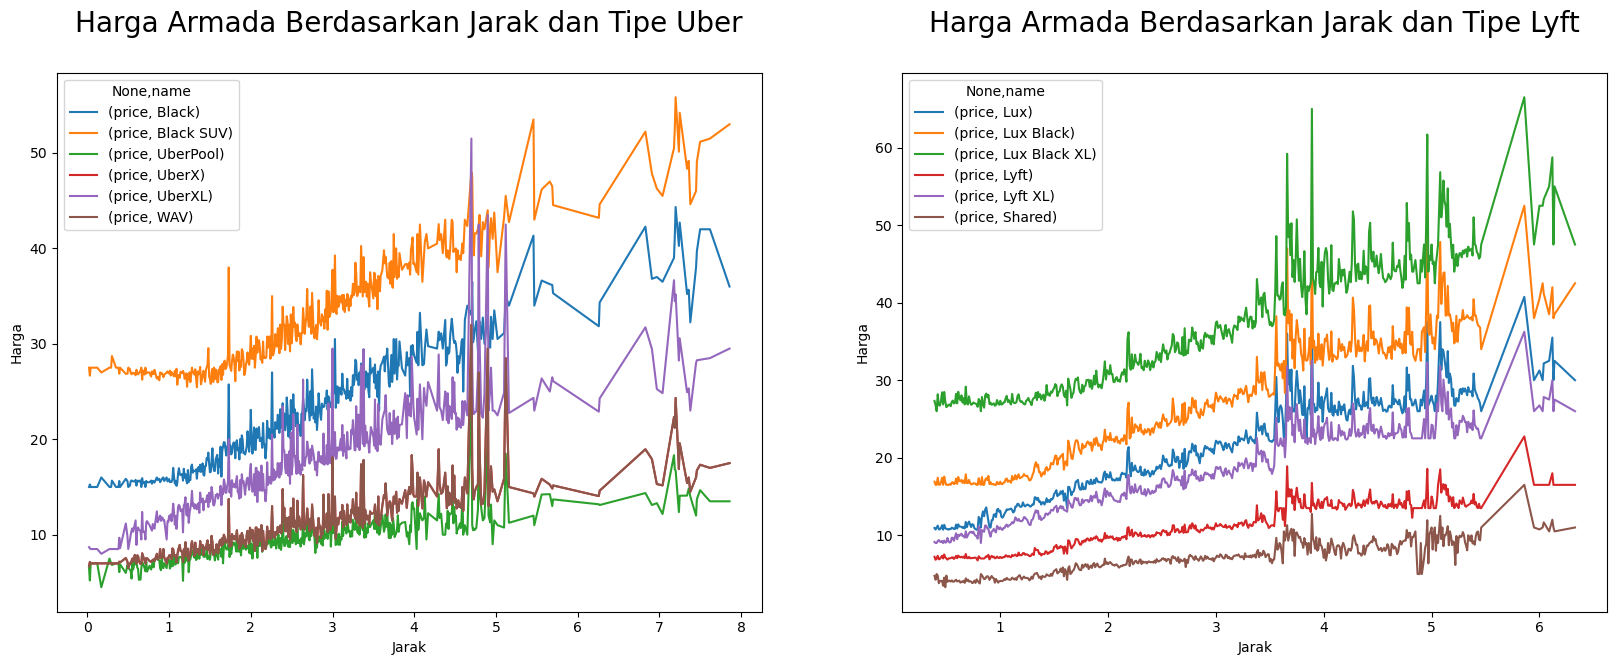

In [27]:
# membuat line chart berdasarkan dataframe Uber dan Lyft type
fig = plt.figure(figsize = (20,7))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Line chart dataframe Uber type
pivot_uber.plot(kind = 'line', ax = ax0)
ax0.set_title('Harga Armada Berdasarkan Jarak dan Tipe Uber\n', fontsize = 20)
ax0.set_xlabel('Jarak', fontsize = 10)
ax0.set_ylabel('Harga', fontsize = 10)

#Line plot untuk dataframe Lyft
pivot_lyft.plot(kind="line", ax=ax1)
ax1.set_title('Harga Armada Berdasarkan Jarak dan Tipe Lyft\n', fontsize = 20)
ax1.set_xlabel('Jarak', fontsize = 10)
ax1.set_ylabel('Harga', fontsize = 10)

Berdasarkan visualisasi di atas, diketahui bahwa tipe mobil Black (Uber) dan Lux (Lyft) merupakan harga tertinggi dari masing-masing taksi. Tpe mobil WAV(Uer) dan Lux (Lyft) merupakan harga terendah dari masing-masing taksi.

### Banyaknya harga perjalanan yang digandakan berdasarkan surge_multiplier

In [28]:
# mendefinisikan dataframe uber dan lyft
df_uber = df[df['cab_type'] == 'Uber']
df_lyft = df[df['cab_type'] == 'Lyft']

# melihat surge_multiplier masing-masing
print("Penggandaan Harga pada Uber:\n", df_uber['surge_multiplier'].value_counts())
print(   )
print("Penggandaan harga pada Lyft:\n", df_lyft['surge_multiplier'].value_counts())

Penggandaan Harga pada Uber:
 1.0    330568
Name: surge_multiplier, dtype: int64

Penggandaan harga pada Lyft:
 1.00    286433
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64


Berdasarkan visualisai di atas, diperoleh bahwa uber tidak melakukan penggandaan harga pada armadanya. Sedangkan, lyft paling sering melakukan penggandaan harga sebesar 1.25 kali lipat sebanyak 11085 perjalanan diikuti penggandaan sebesar 1.50, 1.75, 2.00, 2.50, dan 3.00 kali lipat

### Waktu Pemesanan Ueber dan Lyft Berdasarkan hour

In [29]:
# melihat distribusi waktu pemesanan uber dan lyft
df_hour = df[['cab_type', 'hour']].value_counts()
df_hour

cab_type  hour
Uber      23      15351
          0       15215
          14      14670
Lyft      0       14657
Uber      16      14623
          10      14593
          11      14574
          18      14554
          15      14474
          13      14474
          12      14384
          17      14222
Lyft      23      14004
          17      13853
Uber      22      13846
          2       13775
          9       13725
          1       13641
Lyft      12      13633
Uber      4       13623
Lyft      13      13503
          18      13404
          15      13394
          11      13372
          16      13349
          10      13325
Uber      3       13306
Lyft      14      13306
          22      13247
Uber      6       13212
          21      13069
          19      12949
Lyft      9       12948
Uber      20      12905
Lyft      1       12669
          2       12548
          4       12502
          21      12480
          19      12461
          3       12224
          6       11935
U

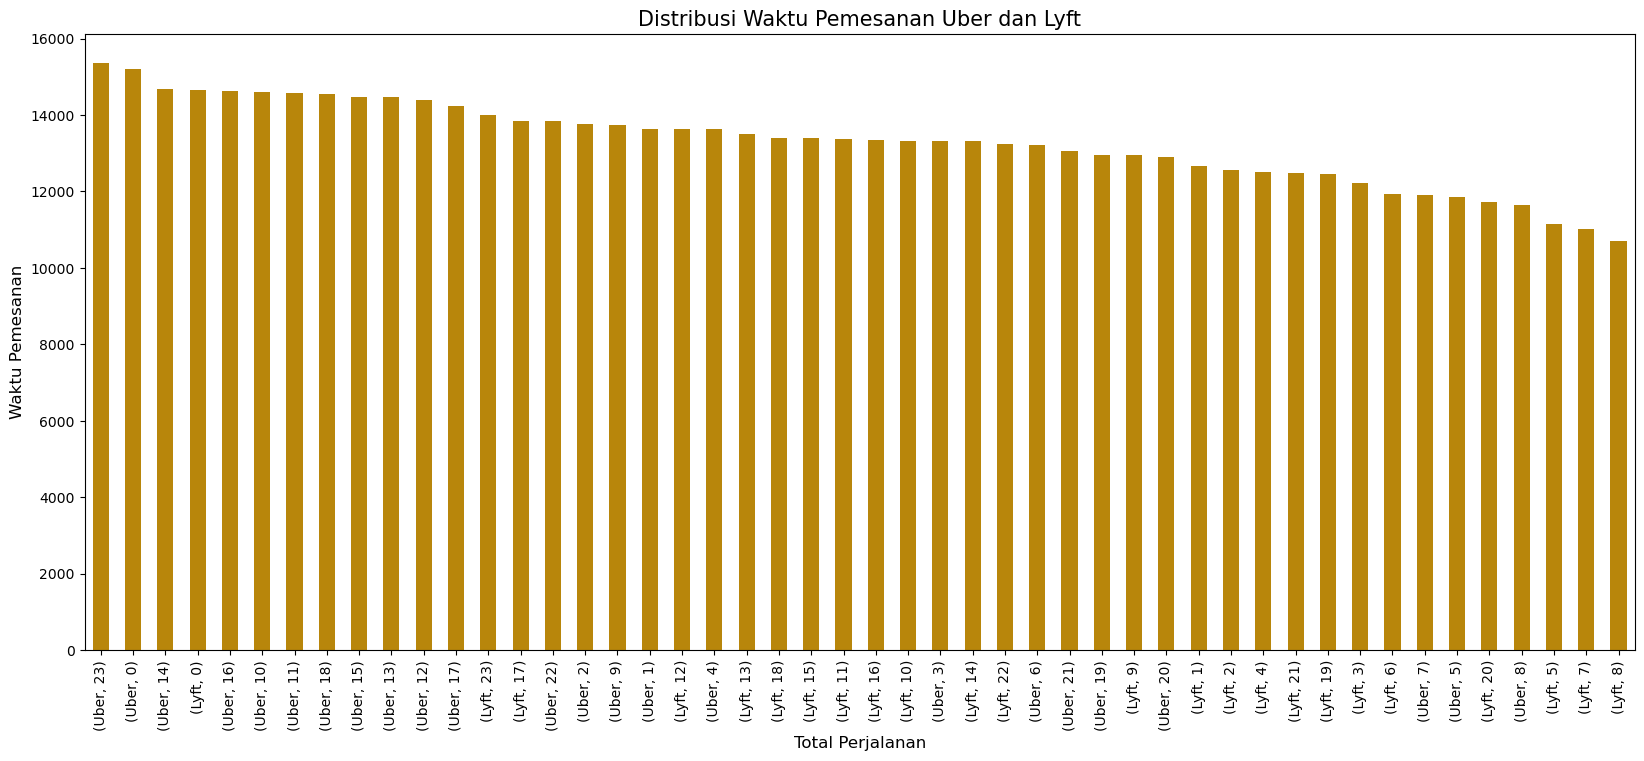

In [30]:
# visualisasi distribusi waktu pemesanan taxi
df_hour.plot(kind = 'bar', 
             figsize = (20,8), 
             color = 'darkgoldenrod')

plt.title('Distribusi Waktu Pemesanan Uber dan Lyft', fontsize = 15)
plt.ylabel('Waktu Pemesanan', fontsize = 12)
plt.xlabel('Total Perjalanan', fontsize = 12)
plt.show()

Berdasarkan visualisasi di atas, diperoleh bahwa total pemesanan terbanyak Uber dan Lyft terjadi pada pukul 23.00 hingga 00.00. Sedangkan, pemesanan Uber dan Lyft paling sedikit terjadi sekitar pukul 08.00.

### Korelasi Kolom Numerik

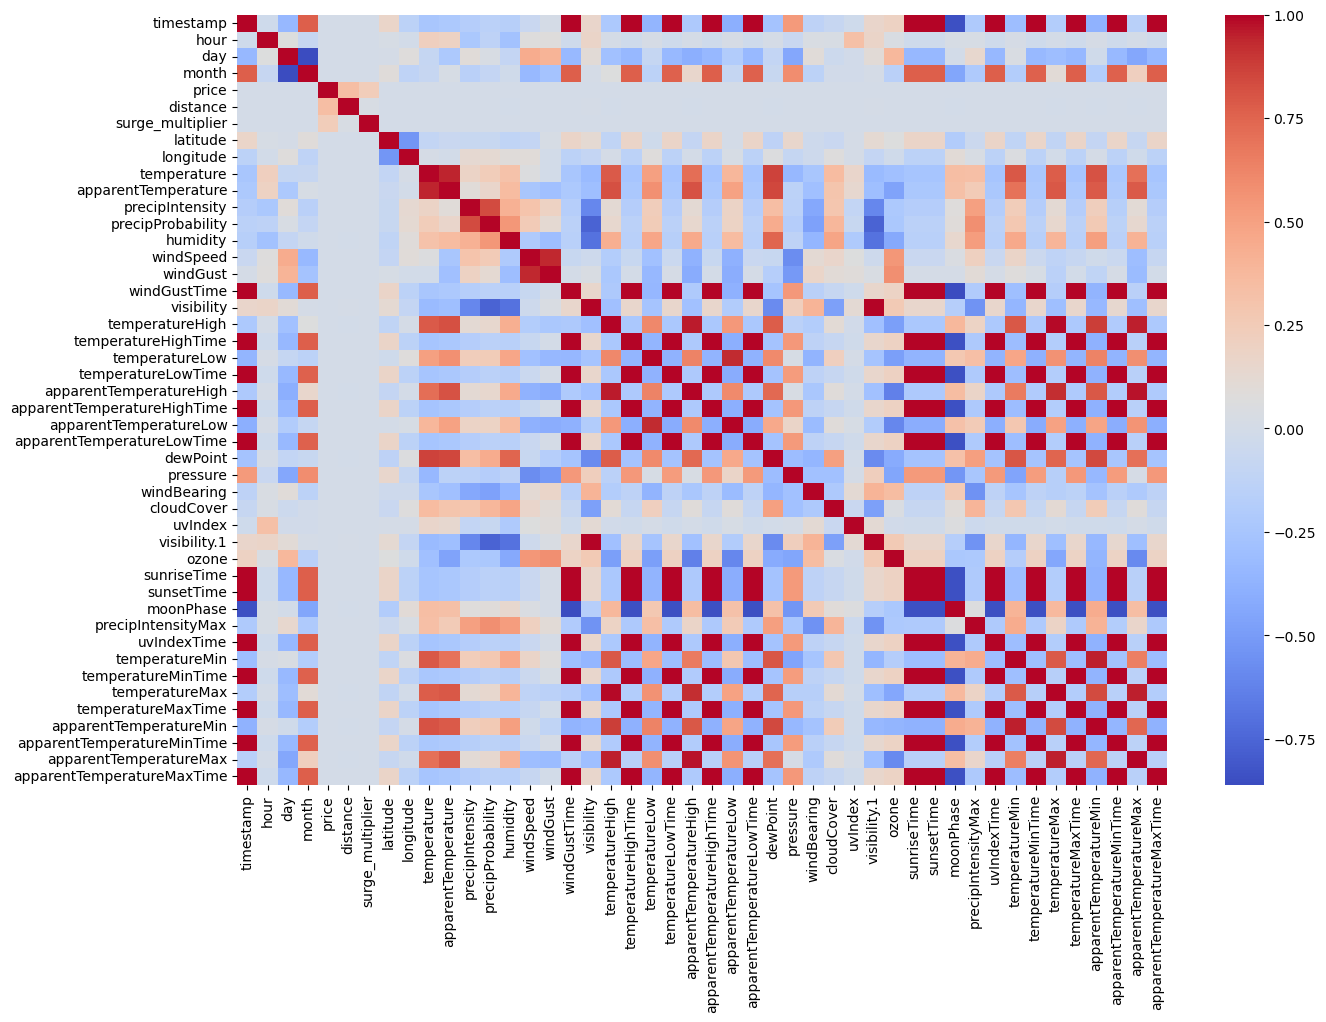

In [31]:
# buat plot matriks korelasi menggunakan heatmap
plt.figure(figsize = (15, 10))
ax = sns.heatmap(df.corr(), cmap = 'coolwarm')

Karena kita ingin mengetahui fitur apa saja yang memengaruhi variabel dependen price, maka akan diurutkan 5 variabel dengan koefisien korelasi tertinggi.

In [32]:
# melihat nilai korelasi dari masing-masing variabel
correlation_matrix = df.corr()

In [33]:
# menampilkan 5 korelasi tertinggi terhadap kolom target
target_correlations = correlation_matrix['price']
abs_target_correlations = target_correlations.abs()
top_10_correlations = abs_target_correlations.nlargest(5)
top_10_correlations

price               1.000000
distance            0.345061
surge_multiplier    0.240458
latitude            0.002088
moonPhase           0.001602
Name: price, dtype: float64

Berdasarkan hasil yang diperoleh, dapat disimpulkan bahwa data berdasarkan cuaca tidak memberikan pengaruh yang signifikan terhadap besarnya harga. Sehingga, diperoleh bahwa kolom price memiliki korelasi yang baik terhadap kolom distance dan surge_multiplier, dan berdasarkan hasil di atas bahwa karakteristik cuaca tidak menunjukkan adanya korelasi yang baik terhadap variabel target. Sehingga, variabel independen yang digunakan untuk linear regression adalah hour, cab_type, name, distance, dan surge_multiplier.

### Data Preprocessing

Selanjutnya, kita akan memilih kolom-kolom yang diperlukan sebagai variabel independen.

In [34]:
# Mengambil kolom-kolom yang dibutuhkan
df_col = ['cab_type', 'name', 'hour', 'distance', 'surge_multiplier', 'price']
df1 = df[df_col]
df1

,cab_type,name,hour,distance,surge_multiplier,price
0,Lyft,Shared,9,0.44,1.0,5.0
1,Lyft,Lux,2,0.44,1.0,11.0
2,Lyft,Lyft,1,0.44,1.0,7.0
3,Lyft,Lux Black XL,4,0.44,1.0,26.0
4,Lyft,Lyft XL,3,0.44,1.0,9.0
...,...,...,...,...,...,...
693065,Uber,WAV,23,1.00,1.0,9.5
693066,Uber,UberXL,23,1.00,1.0,13.0
693067,Uber,UberX,23,1.00,1.0,9.5
693069,Uber,Black SUV,23,1.00,1.0,27.0


### Statistik Deskriptif Kolom Numerik

In [35]:
df1.describe()

,hour,distance,surge_multiplier,price
count,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,2.189261,1.015068,16.545125
std,6.948776,1.135413,0.095422,9.324359
min,0.000000,0.020000,1.000000,2.500000
25%,6.000000,1.270000,1.000000,9.000000
50%,12.000000,2.160000,1.000000,13.500000
75%,18.000000,2.930000,1.000000,22.500000
max,23.000000,7.860000,3.000000,97.500000


#### Mengatasi Outlier
Berdasarkan hasil yang diperoleh di atas, diduga adanya outlier pada kolom price hal ini dapat dilihat dari jauhnya rentang antara nilai pada kuartil-3 dengan nilai maksimum pada kolom tersebut. Maka, akan dilihat menggunakan visualisasi boxplot di bawah ini.

<Axes: >

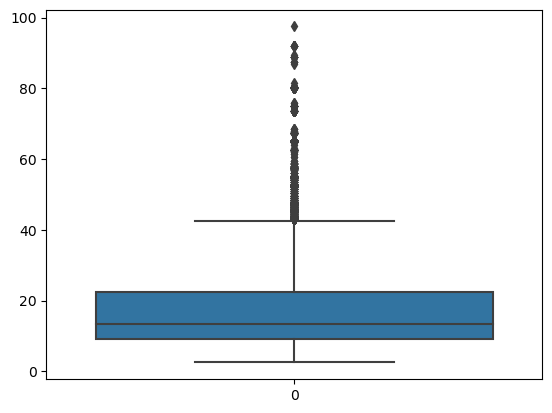

In [36]:
# melihat outlier kolom price menggunakan boxplot
sns.boxplot(df1['price'])

In [37]:
# perhitungan mendeteksi outlier
price_q1 = df1['price'].describe().loc['25%']
price_q3 = df1['price'].describe().loc['75%']
price_iqr = price_q3 - price_q1

price_lower_limit = price_q1 - (1.5 * price_iqr)
price_upper_limit = price_q3 + (1.5 * price_iqr)

df2 = df1[(df1['price'] >= price_lower_limit) & (df1['price'] <= price_upper_limit)].copy()

In [38]:
# melihat ukuran data sebelum dan sesudah handling outlier
print('Data sebelum dihilangkan outliernya :',df1.shape)
print('Data sesudah dihilangkan outliernya :',df2.shape)

Data sebelum dihilangkan outliernya : (637976, 6)
Data sesudah dihilangkan outliernya : (632387, 6)


<Axes: >

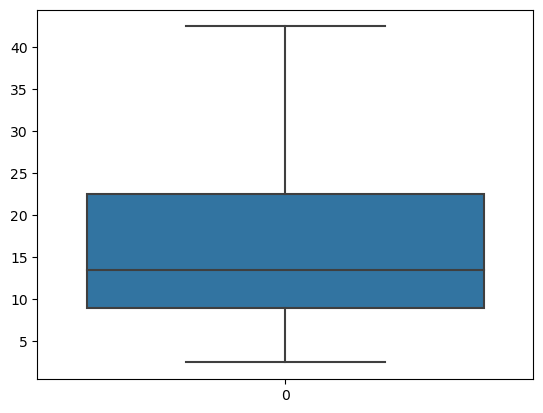

In [41]:
# melihat kolom price setelah handling outlier menggunakan boxplot
sns.boxplot(df2['price'])

### 1. Encoding menggunakan LabelEncoder

Encoding menggunakan label encoding karena terdapat kolom berupa kategorik yang nantinya akan diubah menjadi angka

In [42]:
# menampilkan info dataset terbaru
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632387 entries, 0 to 693070
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          632387 non-null  object 
 1   name              632387 non-null  object 
 2   hour              632387 non-null  int64  
 3   distance          632387 non-null  float64
 4   surge_multiplier  632387 non-null  float64
 5   price             632387 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 49.9+ MB


In [43]:
# mendefinisikan object encoder dari modul preprocessing
le = preprocessing.LabelEncoder()

df2_encode1 = df2.copy()

for col in df2.select_dtypes(include='O').columns:
    df2_encode1[col]=le.fit_transform(df2[col])

In [44]:
# menampilkan data yang sudah dilakukan encoding
df2_encode1

,cab_type,name,hour,distance,surge_multiplier,price
0,0,7,9,0.44,1.0,5.0
1,0,2,2,0.44,1.0,11.0
2,0,5,1,0.44,1.0,7.0
3,0,4,4,0.44,1.0,26.0
4,0,6,3,0.44,1.0,9.0
...,...,...,...,...,...,...
693065,1,11,23,1.00,1.0,9.5
693066,1,10,23,1.00,1.0,13.0
693067,1,9,23,1.00,1.0,9.5
693069,1,1,23,1.00,1.0,27.0


## Pendefinisian Model

In [45]:
# mendefinisikan model linear regresi
lr1 = LinearRegression()

## Pelatihan Model

In [46]:
# membagi variabel independen (x) dan variabel dependen (y)
X1 = df2_encode1.drop(columns = ['price'], axis = 1).values
y1 = df2_encode1['price'].values

# memisahkan data train dan testing dengan perbandingan 70:30
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

In [47]:
lr_model1 = lr1.fit(X_train1, y_train1)
y_pred1 = lr_model1.predict(X_test1)

## Evaluasi Model

In [48]:
print("Slope:\n", lr_model1.coef_)
print("Intercept:\n", lr_model1.intercept_)

Slope:
 [ 2.32397938e+00 -1.60590053e+00  1.24094952e-03  2.54781316e+00
  1.27151995e+01]
Intercept:
 5.534711569659329


Kesimpulan :

Nilai slope menunjukkan seberapa besar pengaruh setiap variabel independen terhadap variabel dependennya. Sedangkan, nilai intercept menunjukkan prediksi apabila semua variabel independennya bernilai nol.
Hasil dari pemodelan di atas, diperoleh model sebagai berikut

Y = 5.53 + 2.32 X1 - 1.61 X2 + 1.24 X3 + 2.54 X4 + 1.27 X5

dimana

-Y = price

-X1 = cab_type

-X2 = name

-X3 = hour

-X4 = distance

-X5 = surge_multiplier

In [50]:
print("r2 score :", r2_score(y_test1, y_pred1)*100)
print("mse score :", mean_squared_error(y_test1, y_pred1))
print("rmse score :", np.sqrt(mean_squared_error(y_test1, y_pred1)))

r2 score : 49.82070070936986
mse score : 38.70897713871414
rmse score : 6.221653890945247


Kesimpulan :

Nilai R2 menunjukkan seberapa besar variabilitas dalam data yang telah diolah. Diketahui nilai R2 pada model regresi yang diuji diperoleh 0.49 atau 49.82%. Artinya, variasi harga Uber dan Lyft dapat dijelaskan oleh variabel cab_type, name, hour, distance, dan surge_multiplier sebesar 49.82%. Terdapat sekitar 50.17% dijelaskam oleh faktor lain yang tidak dimasukkan ke dalam data. 

Selain itu, model ini memiliki nilai MSE (Mean Squared Error) menunjukkan seberapa besar rata-rata kuadrat perbedaan antara nilai prediksi dengan niilai sebenarnya. Sedangkan, RMSE (Root Mean Squared Error) menunjukkan besaran nilai kesalahan prediksi model dalam satuan data yang diukur. Diketahui nilai MSE pada model regresi yang diuji diperoleh sebesar 38.71 dengan nilai RMSE sebesar 6.22 yang mana kedua nilainya relatif besar.

### 2. Encoding menggunakan OneHotEncoder

Encoding menggunakan onehotencoder karena hasil yang diperoleh apabila menggunakan labelencoder kurang baik, sehingga akan dilakukan percobaan apabila menggunakan onehotencoder

In [51]:
# menampilkan info dataset terbaru
df2_2 = df2.copy()
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632387 entries, 0 to 693070
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          632387 non-null  object 
 1   name              632387 non-null  object 
 2   hour              632387 non-null  int64  
 3   distance          632387 non-null  float64
 4   surge_multiplier  632387 non-null  float64
 5   price             632387 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 49.9+ MB


In [52]:
cat_col = df2_2.select_dtypes(include = ['object', 'category']).columns.tolist()

# encoder kolom dengan nilai kategorik
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(df2_2[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names_out([col])
    df2_2 = df2_2.drop(col, axis = 1)
    df2_2 = pd.concat([df2_2, enc_df], axis = 1)

In [53]:
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692596 entries, 0 to 687635
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hour               632387 non-null  float64
 1   distance           632387 non-null  float64
 2   surge_multiplier   632387 non-null  float64
 3   price              632387 non-null  float64
 4   cab_type_Lyft      632387 non-null  float64
 5   cab_type_Uber      632387 non-null  float64
 6   name_Black         687650 non-null  float64
 7   name_Black SUV     687650 non-null  float64
 8   name_Lux           687650 non-null  float64
 9   name_Lux Black     687650 non-null  float64
 10  name_Lux Black XL  687650 non-null  float64
 11  name_Lyft          687650 non-null  float64
 12  name_Lyft XL       687650 non-null  float64
 13  name_Shared        687650 non-null  float64
 14  name_UberPool      687650 non-null  float64
 15  name_UberX         687650 non-null  float64
 16  na

In [54]:
df2_2.dropna(inplace = True)
df2_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577124 entries, 0 to 632386
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hour               577124 non-null  float64
 1   distance           577124 non-null  float64
 2   surge_multiplier   577124 non-null  float64
 3   price              577124 non-null  float64
 4   cab_type_Lyft      577124 non-null  float64
 5   cab_type_Uber      577124 non-null  float64
 6   name_Black         577124 non-null  float64
 7   name_Black SUV     577124 non-null  float64
 8   name_Lux           577124 non-null  float64
 9   name_Lux Black     577124 non-null  float64
 10  name_Lux Black XL  577124 non-null  float64
 11  name_Lyft          577124 non-null  float64
 12  name_Lyft XL       577124 non-null  float64
 13  name_Shared        577124 non-null  float64
 14  name_UberPool      577124 non-null  float64
 15  name_UberX         577124 non-null  float64
 16  na

## Pendefinisian Model

In [55]:
# mendefinisikan model linear regresi
lr2 = LinearRegression()

## Pelatihan Model

In [56]:
# membagi variabel independen (x) dan variabel dependen (y)
X2 = df2_2.drop(columns = ['price'], axis = 1).values
y2 = df2_2['price'].values

# memisahkan data train dan testing dengan perbandingan 70:30
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [57]:
lr_model2 = lr2.fit(X_train2, y_train2)
y_pred2 = lr_model2.predict(X_test2)

## Evaluasi Model

In [58]:
print("Slope:\n", lr_model2.coef_)
print("Intercept:\n", lr_model2.intercept_)

Slope:
 [ 6.24767323e-04  2.49465812e+00  1.47973104e+01 -3.80401370e+11
  3.57649718e+11 -4.06669055e+11 -4.06669055e+11  3.31382033e+11
  3.31382033e+11  3.31382033e+11  3.31382033e+11  3.31382033e+11
  3.31382033e+11 -4.06669055e+11 -4.06669055e+11 -4.06669055e+11
 -4.06669055e+11  0.00000000e+00]
Intercept:
 49019336818.63795


In [59]:
print("r2 score :", r2_score(y_test2, y_pred2)*100)
print("mse score :", mean_squared_error(y_test2, y_pred2))
print("rmse score :", np.sqrt(mean_squared_error(y_test2, y_pred2)))

r2 score : 12.030415491251311
mse score : 67.73498159738007
rmse score : 8.230126463024737


Kesimpulan :

Nilai R2 menunjukkan seberapa besar variabilitas dalam data yang telah diolah. Diketahui nilai R2 pada model regresi yang diuji diperoleh 0.93 atau 93.36%. Artinya, variasi harga Uber dan Lyft dapat dijelaskan oleh variabel cab_type, name, hour, distance, dan surge_multiplier sebesar 93.36%. Terdapat sekitar 6.63% dijelaskam oleh faktor lain yang tidak dimasukkan ke dalam data. 

Selain itu, model ini memiliki nilai MSE (Mean Squared Error) menunjukkan seberapa besar rata-rata kuadrat perbedaan antara nilai prediksi dengan niilai sebenarnya. Sedangkan, RMSE (Root Mean Squared Error) menunjukkan besaran nilai kesalahan prediksi model dalam satuan data yang diukur. Diketahui nilai MSE pada model regresi yang diuji diperoleh sebesar 5.11 dengan nilai RMSE sebesar 2.26 yang mana kedua nilainya relatif kecil.

## Model Inference

Karena nilai model 2 menunjukkan hasil yang lebih baik, maka akan dipilih model 2 unjuk diuji. Untuk menguji keakuratan model, dilakukan model inference untuk menguji model tersebut dengan data di luar data yang tersedia.

Kasus: Seseorang ingin memprediksi harga perjalanan taksi menggunakan Uber dengan mobil UberXL pada pukul 8 malam. Jarak yang ditempuh ke tempat tujuan adalah sekitar 3 km.

In [61]:
types = input('Uber/Lyft? ')
name = input('Ride Type: ')
hour = int(input('Hour: '))
distance = float(input('Distance: '))
surge_multiplier = float(input('Surge Multiplier: '))


val = [hour, distance, surge_multiplier]

cab_type = {'Uber' : 0, 
            'Lyft' : 1}

for i in range(0,2):
    if cab_type[types] == i:
        val.append(1.0)
    else:
        val.append(0.0)
        
ride_types = {'UberX' : 0,
              'UberXL' : 1,
              'Black' : 2,
              'BlackSUV': 3,
              'WAV' : 4,
              'UberPool' : 5,
              'Taxi' : 6,
              'Shared' : 7,
              'Lyft' : 8,
              'LyftXL' : 9,
              'Lux' : 10,
              'LuxBlack' : 11,
              'LuxBlackXL' : 12}

for i in range(0,13):
    if ride_types[name] == i:
        val.append(1.0)
    else:
        val.append(0.0)

print(val)

predict = lr_model2.predict([val])

print('Estimated Price: ', predict)

Uber/Lyft? Uber
Ride Type: UberXL
Hour: 20
Distance: 3
Surge Multiplier: 1.0
[20, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Estimated Price:  [-7.38051088e+11]


Kesimpulan
Dari analisis tersebut, transportasi umum Uber lebih banyak peminatnya dibandingkan Lyft. Transportasi ini memiliki berbagai kriteria seperti car type. Semakin mewah penawaran yang ditawarkan trasportasi ini, maka semakin tinggi tarif yang harus dibayar oleh pengguna jasa.

Pemilihan feature pada regresi linear pada projek ini adalah:

X = 'cab_type', 'name', 'hour', 'distance', 'surge_multiplier'

Y = 'price'

Berdasarkan hasil yang diperoleh di atas, terdapat perbedaan antara encoding menggunakan OneHotEncoder dengan LabelEncoder. Dalam Linear Regression, LabelEncoder dapat mengakibatkan pengurangan kualitas data, karena nilai-nilai kategori hanya diwakili oleh bilangan bulat acak dan tidak selalu memperlihatkan hubungan yang akurat antara nilai-nilai kategori tersebut. Di sisi lain, OneHotEncoder mengubah setiap nilai kategori menjadi fitur biner yang menunjukkan apakah fitur itu ada atau tidak dalam setiap sampel. Hal ini dapat membantu mempertahankan informasi kategori dengan cara yang lebih akurat dan tanpa bias, sehingga memungkinkan Linear Regression untuk memodelkan hubungan antara fitur numerik dan fitur kategori secara lebih efektif. Oleh Karena itu, OneHotEncoder lebih disukai daripada LabelEncoder dalam penggunaan Linear Regression karena Linear Regression bekerja dengan nilai-nilai numerik dan kontinu.

Namun, terdapat faktor lain yang memengaruhi hal tersebut juga dipengaruhi oleh jenis data yang digunakan dan jenis model yang digunakan, sehingga perlu dilakukan evaluasi model secara menyeluruh sebelum memutuskan metode encoding mana yang lebih cocok untuk data dan model yang sedang digunakan.

Hasil Model Interfence: Berdasarkan hasil dari model interfence, memprediksi harga sebesar 32.24. Perjalanan yang dilakukan menggunakan Uber dengan panjang rute perjalanan 3km menggunakan mobil bertipe UberXL pada pukul 20.00 dengan perhitungan tanpa adanya penggandaan harga.

​
